In [1]:
import numpy as np
import os
import re
import pandas as pd
import time as time
import keras
import pickle
from sklearn import tree
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau)
from keras.models import load_model
from mlxtend.plotting import plot_confusion_matrix

In [2]:
dirname = os.path.join(os.getcwd(), './train')
imgpath = dirname + os.sep 

imagenes = []
carpetas = []
cantcarpetas = []
prevRoot=''
cantidad=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cantidad=cantidad+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            imagenes.append(image)
            b = "Leyendo..." + str(cantidad)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cantidad)
                prevRoot=root
                carpetas.append(root)
                cantcarpetas.append(cantidad)
                cantidad=0
cantcarpetas.append(cantidad)

cantcarpetas = cantcarpetas[1:]
cantcarpetas[0]=cantcarpetas[0]+1
print('Carpetas leidas: ',len(carpetas))
print("Imagenes en cada carpeta: ", cantcarpetas)
print('Suma Total de imagenes: ',sum(cantcarpetas))


leyendo imagenes de  C:\Users\DiegoG\Desktop\UIDE\TratamientoDeDatos\ExamenFinal\./train\
C:\Users\DiegoG\Desktop\UIDE\TratamientoDeDatos\ExamenFinal\./train\CLASS_02 1
C:\Users\DiegoG\Desktop\UIDE\TratamientoDeDatos\ExamenFinal\./train\CLASS_03 62
C:\Users\DiegoG\Desktop\UIDE\TratamientoDeDatos\ExamenFinal\./train\CLASS_04 213
C:\Users\DiegoG\Desktop\UIDE\TratamientoDeDatos\ExamenFinal\./train\CLASS_05 105
C:\Users\DiegoG\Desktop\UIDE\TratamientoDeDatos\ExamenFinal\./train\CLASS_06 949
C:\Users\DiegoG\Desktop\UIDE\TratamientoDeDatos\ExamenFinal\./train\CLASS_07 37
C:\Users\DiegoG\Desktop\UIDE\TratamientoDeDatos\ExamenFinal\./train\CLASS_08 204
Carpetas leidas:  7
Imagenes en cada carpeta:  [63, 213, 105, 949, 37, 204, 62]
Suma Total de imagenes:  1633


In [3]:
    labels=[]
    indice=0
    for cantidad in cantcarpetas:
        for i in range(cantidad):
            labels.append(indice)
        indice=indice+1
    print("Cantidad de etiquetas creadas: ", len(labels))


Cantidad de etiquetas creadas:  1633


In [4]:
tipocarne=[]
indice=0
for directorio in carpetas:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    tipocarne.append(name[len(name)-1])
    indice=indice+1

0 CLASS_02
1 CLASS_03
2 CLASS_04
3 CLASS_05
4 CLASS_06
5 CLASS_07
6 CLASS_08


In [5]:
y = np.array(labels)
X = np.array(imagenes, dtype=np.uint8) 

classes = np.unique(y)
nClasses = len(classes)
print('Total numero de salida : ', nClasses)
print('Salidas: ', classes)

Total numero de salida :  7
Salidas:  [0 1 2 3 4 5 6]


In [6]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.6)
print('Training Data : ', train_X.shape, train_Y.shape)
print('Testing Data : ', test_X.shape, test_Y.shape)


Training Data :  (653, 216, 384, 3) (653,)
Testing Data :  (980, 216, 384, 3) (980,)


In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory('./train', validation_split = 0.6, subset = "training", seed = 123, image_size = [300,300])

Found 1633 files belonging to 8 classes.
Using 654 files for training.


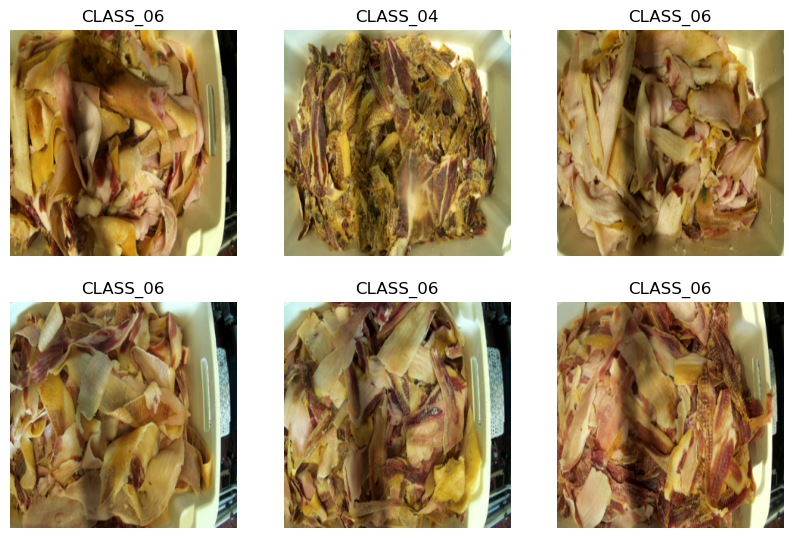

In [8]:
plt.figure(figsize=[10,10])

for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(tipocarne[labels[i]])
        plt.axis("off")

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


In [10]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0.]


In [11]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(522, 216, 384, 3) (131, 216, 384, 3) (522, 7) (131, 7)


In [12]:
INIT_LR = 1e-3 
epochs = 6
batch_size = 64 

tipocarne_model = Sequential()
tipocarne_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
tipocarne_model.add(MaxPooling2D((2, 2),padding='same'))
tipocarne_model.add(Dropout(0.5))

tipocarne_model.add(Flatten())
tipocarne_model.add(Dense(32, activation='linear'))
tipocarne_model.add(Dropout(0.5))
tipocarne_model.add(Dense(nClasses, activation='softmax'))

In [13]:
num_classes = len(imgpath)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)   
])

 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)       

In [14]:
carne_train = model.fit(train_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/6
21/21 [==============================] - 45s 2s/step - loss: 2.1702 - accuracy: 0.4817
Epoch 2/6
21/21 [==============================] - 49s 2s/step - loss: 0.9986 - accuracy: 0.6575
Epoch 3/6
21/21 [==============================] - 50s 2s/step - loss: 0.6108 - accuracy: 0.7798
Epoch 4/6
21/21 [==============================] - 51s 2s/step - loss: 0.3834 - accuracy: 0.8685
Epoch 5/6
21/21 [==============================] - 55s 3s/step - loss: 0.2232 - accuracy: 0.9297
Epoch 6/6
21/21 [==============================] - 59s 3s/step - loss: 0.0884 - accuracy: 0.9679


In [15]:
model.save("ExamenFinal.h5py")

INFO:tensorflow:Assets written to: ExamenFinal.h5py\assets


INFO:tensorflow:Assets written to: ExamenFinal.h5py\assets


In [16]:
test_ds = tf.keras.utils.image_dataset_from_directory('./test', seed = 123, image_size = [300,300])

train_evaluacion = model.evaluate(train_ds, verbose=1)
test_evaluacion = model.evaluate(test_ds, verbose=1)
print(f"Accuracy test: {round(100 * test_evaluacion[1], 2)}")
print(f"Accuracy train: {round(100 * train_evaluacion[1], 2)}")

Found 810 files belonging to 8 classes.
26/26 [==============================] - 21s 742ms/step - loss: 0.6701 - accuracy: 0.8247
Accuracy test: 82.47
Accuracy train: 98.17


Found 810 images belonging to 8 classes.
Found 1633 images belonging to 8 classes.
52/52 [==============================] - 43s 822ms/step


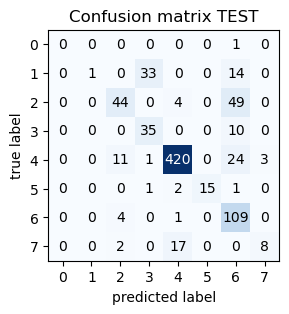

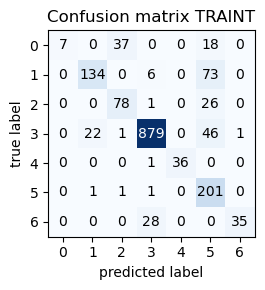

In [17]:
test_data_dir = './test'
train_data_dir = './train'

width_shape = 300
height_shape = 300

custom_Model= load_model("./ExamenFinal.h5py")

test_datagen =ImageDataGenerator()
train_datagen =ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(width_shape, height_shape), class_mode='categorical', shuffle=False)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(width_shape, height_shape), class_mode='categorical', shuffle=False)

test_predictions = custom_Model.predict(test_generator)
train_predictions = custom_Model.predict(train_generator)

y_pred = np.argmax(test_predictions, axis=1)
y_real = test_generator.classes
x_pred = np.argmax(train_predictions, axis=1)
x_real = train_generator.classes

y_matc=confusion_matrix(y_real, y_pred)
x_matc=confusion_matrix(x_real, x_pred)

plot_confusion_matrix(conf_mat=y_matc, figsize=(3,3), show_normed=False)
plt.title('Confusion matrix TEST')
plot_confusion_matrix(conf_mat=x_matc, figsize=(3,3), show_normed=False)
plt.title('Confusion matrix TRAINT')
plt.tight_layout()
